# Restaurant Recommendation System

This project implements a restaurant recommendation system using content-based filtering. The system recommends restaurants based on their categories using a TF-IDF vectorization approach and cosine similarity.

## Installing Libraries

In [74]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly
import plotly_express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import folium

## Load the dataset

In [76]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head

<bound method NDFrame.head of                    business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  52

In [77]:
df.shape

(150346, 14)

## Exploratory Data Analysis

Create data frame for restaurants category in Pennsylvania

In [80]:
pennsylvania_df = df[(df['state'] == 'PA') & (df['categories'].str.contains('Restaurants', case=False, na=False))]

In [81]:
pennsylvania_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12641 entries, 3 to 150336
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   12641 non-null  object 
 1   name          12641 non-null  object 
 2   address       12641 non-null  object 
 3   city          12641 non-null  object 
 4   state         12641 non-null  object 
 5   postal_code   12641 non-null  object 
 6   latitude      12641 non-null  float64
 7   longitude     12641 non-null  float64
 8   stars         12641 non-null  float64
 9   review_count  12641 non-null  int64  
 10  is_open       12641 non-null  int64  
 11  attributes    12535 non-null  object 
 12  categories    12641 non-null  object 
 13  hours         10680 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.4+ MB


## Plot The Data

Create plot for Restaurants' stars/ratings

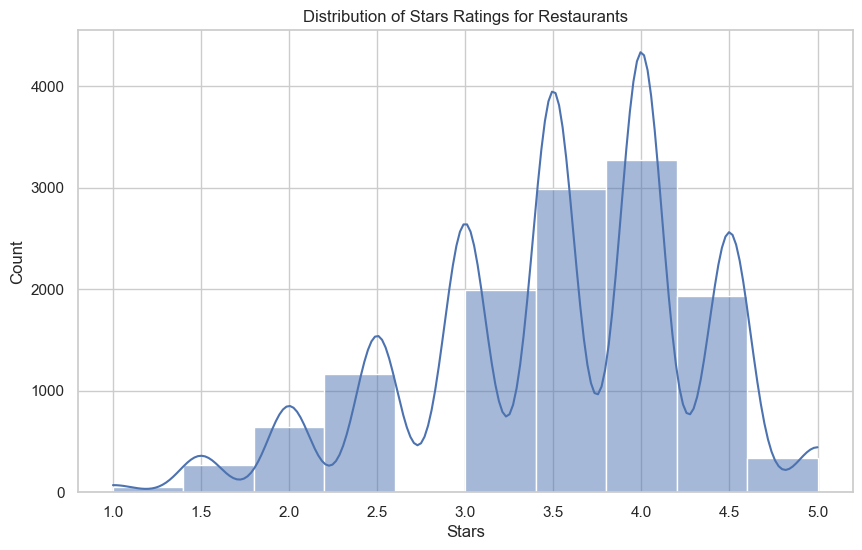

In [84]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of stars ratings for restaurants
plt.figure(figsize=(10, 6))
sns.histplot(pennsylvania_df['stars'], bins=10, kde=True)
plt.title('Distribution of Stars Ratings for Restaurants')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

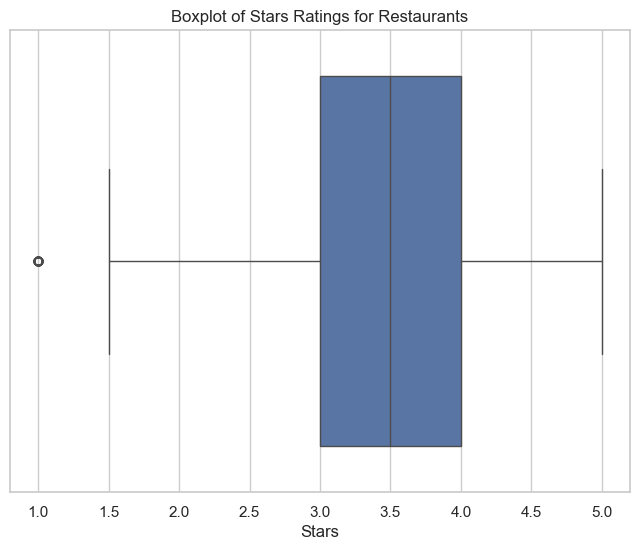

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=pennsylvania_df['stars'])
plt.title('Boxplot of Stars Ratings for Restaurants')
plt.xlabel('Stars')
plt.show()

## Create plot for top 20 restaurants

In [87]:
top_restaurants = pennsylvania_df.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

business_id                     name              address  \
143157  ytynqOUb3hjKeJfRj5Tshw  Reading Terminal Market         51 N 12th St   
113983  PP3BBaVxZLcJU54uP_wL6Q     Pat's King of Steaks  1237 E Passyunk Ave   
57332   IkY2ticzHEn4QFn8hQLSWg            Geno's Steaks        1219 S 9th St   
131670  9PZxjhTIU7OgPIzuGi89Ew                   El Vez        121 S 13th St   
31165   ctHjyadbDQAtUFfkcAFEHw                    Zahav      237 St James Pl   

                city state postal_code   latitude  longitude  stars  \
143157  Philadelphia    PA       19107  39.953341 -75.158855    4.5   
113983  Philadelphia    PA       19147  39.933201 -75.159266    3.0   
57332   Philadelphia    PA       19147  39.933837 -75.158814    2.5   
131670  Philadelphia    PA       19107  39.949702 -75.161770    4.0   
31165   Philadelphia    PA       19106  39.946261 -75.145135    4.5   

        review_count  is_open  \
143157          5721        1   
113983          4250        1   
57332           3401        1   
131670          3187        1   
31165           3065        1   

                                               attributes  \
143157  {'RestaurantsGoodForGroups': 'True', 'Restaura...   
113983  {'RestaurantsReservations': 'False', 'Corkage'...   
57332   {'RestaurantsReservations': 'False', 'Corkage'...   
131670  {'RestaurantsReservations': 'True', 'BYOBCorka...   
31165   {'RestaurantsAttire': ''casual'', 'BikeParking...   

                                               categories  \
143157  Candy Stores, Shopping, Department Stores, Fas...   
113983  Italian, American (Traditional), Sandwiches, F...   
57332   Sandwiches, Cheesesteaks, Steakhouses, Restaur...   
131670  Lounges, Bars, Nightlife, Breakfast & Brunch, ...   
31165   Nightlife, Bars, Food, Ethnic Food, Middle Eas...   

                                                    hours  
143157  {'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...  
113983  {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...  
57332   {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...  
131670  {'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...  
31165   {'Monday': '0:0-0:0', 'Tuesday': '16:45-21:30'...

C:\Users\braja\AppData\Local\Temp\ipykernel_3280\736283773.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




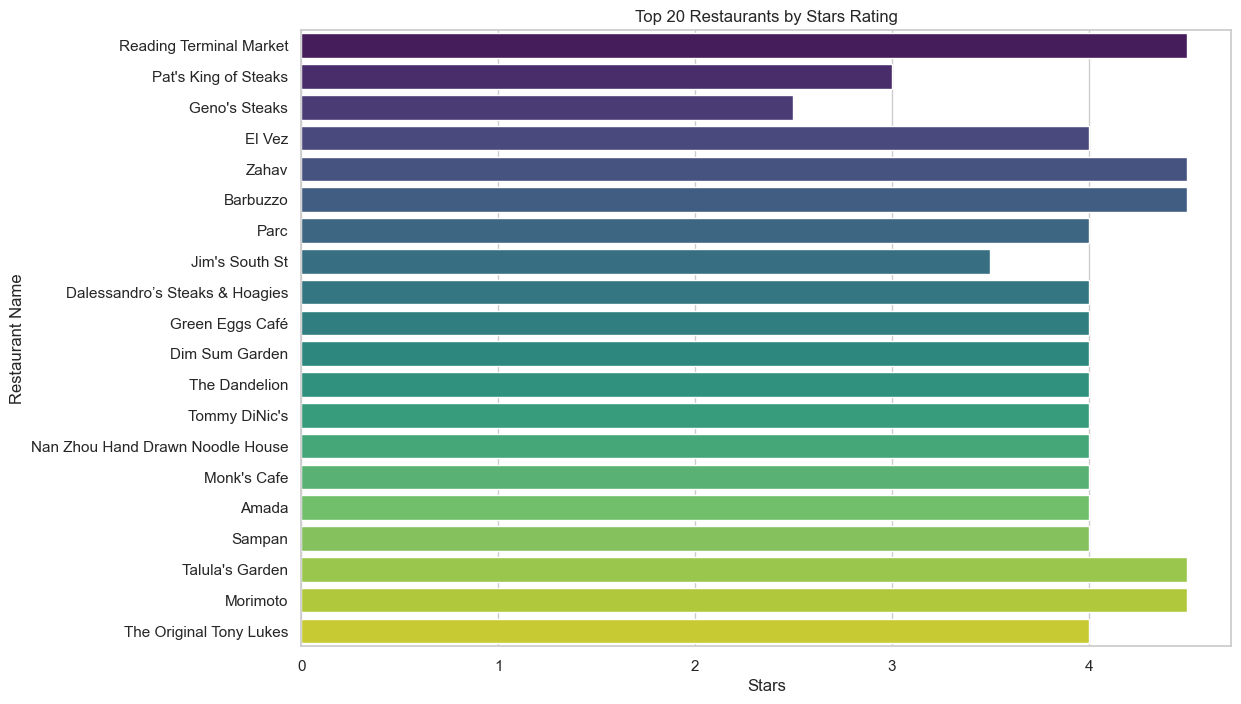

In [88]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=top_restaurants, x='stars', y='name', palette='viridis')

# Set plot labels and title
plt.xlabel('Stars')
plt.ylabel('Restaurant Name')
plt.title('Top 20 Restaurants by Stars Rating')
plt.show()

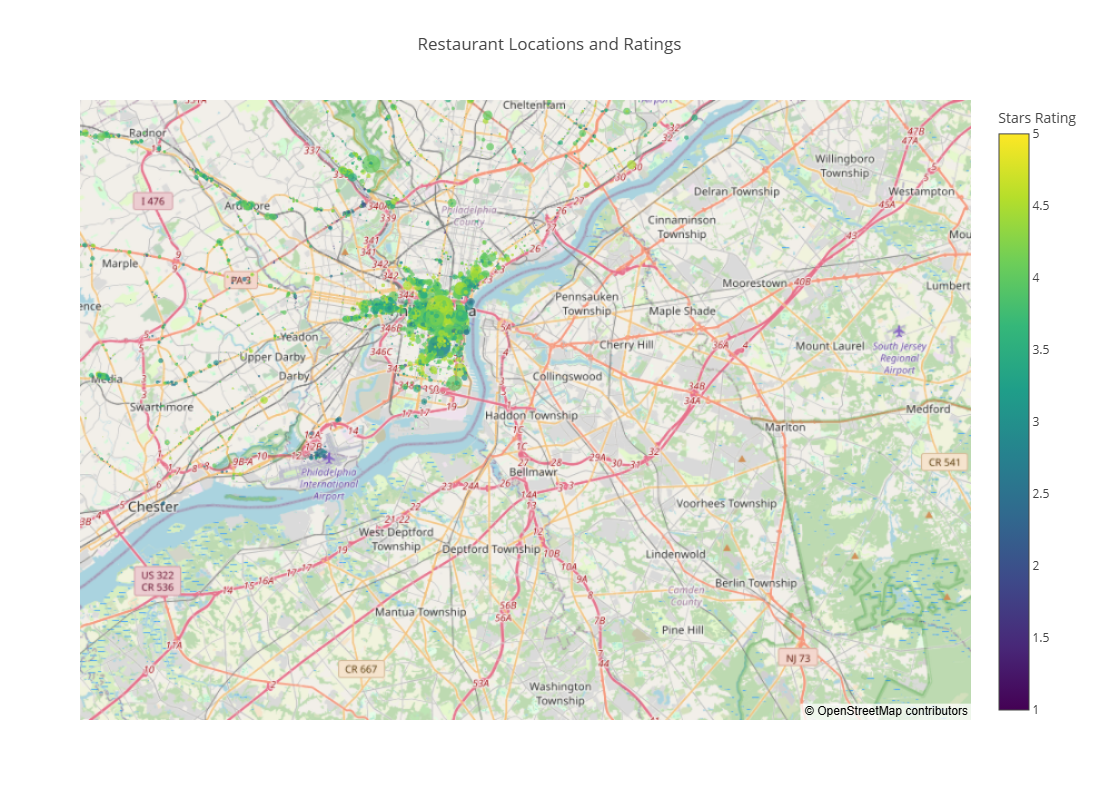

In [89]:
# Create a scatter mapbox
fig = px.scatter_mapbox(
    pennsylvania_df,
    lat='latitude',
    lon='longitude',
    color='stars',  # Color by stars
    size='review_count',   # Size of the markers based on stars
    hover_name='name',  # Show restaurant name on hover
    hover_data=['city', 'state', 'stars'],  # Show city, state, and stars rating
    color_continuous_scale='Viridis',  # Color scale
    title='Restaurant Locations and Ratings',
    labels={'stars': 'Stars Rating'}
)

# Update mapbox settings to use a map style (e.g., 'open-street-map')
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=10,  # Adjust zoom level
    width=1200,
    height=800,
    mapbox_center={"lat": 39.9, "lon": -75.1}  # Center of the map (you can adjust the coordinates)
)

# Show the plot
fig.show()


## Function for restaurant recommendation using TF-IDF vectorization approach and cosine similarity

In [91]:
def recommend_restaurants(df, restaurant_name, top_n=5):
    """
    Recommends restaurants based on content-based filtering using the categories column.

    Parameters:
    - df (pd.DataFrame): DataFrame containing restaurant data.
    - restaurant_name (str): Name of the restaurant to base recommendations on.
    - top_n (int): Number of recommendations to return.

    Returns:
    - pd.DataFrame: DataFrame containing recommended restaurants with their similarity scores.
    """
    if 'categories' not in df.columns:
        raise ValueError("DataFrame must contain a 'categories' column.")

    # Fill NaN categories with empty strings
    df['categories'] = df['categories'].fillna('')

    # Ensure there are non-empty categories
    if df['categories'].str.strip().eq('').all():
        raise ValueError("All entries in the 'categories' column are empty. Cannot compute recommendations.")

    # Reset index to ensure alignment with TF-IDF matrix
    df = df.reset_index(drop=True)

    # Check if the restaurant exists in the DataFrame (case-insensitive match)
    matching_restaurants = df[df['name'].str.lower() == restaurant_name.lower()]
    if matching_restaurants.empty:
        raise ValueError(f"Restaurant '{restaurant_name}' not found in the DataFrame.")

    # Get the exact index of the input restaurant
    restaurant_index = matching_restaurants.index[0]

    # Compute TF-IDF matrix for the 'categories' column
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['categories'])

    if tfidf_matrix.shape[0] == 0:
        raise ValueError("TF-IDF matrix is empty. Check the 'categories' column for valid data.")

    # Debugging information
    print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
    print(f"Restaurant index: {restaurant_index}")

    # Compute cosine similarity between the input restaurant and all others
    cosine_similarities = linear_kernel(tfidf_matrix[restaurant_index:restaurant_index+1], tfidf_matrix).flatten()

    # Get indices of the top_n most similar restaurants (excluding the input restaurant itself)
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]

    if len(similar_indices) == 0:
        raise ValueError("No similar restaurants found.")

    # Build a DataFrame with recommendations
    recommendations = df.iloc[similar_indices].copy()
    recommendations['similarity_score'] = cosine_similarities[similar_indices]

    return recommendations[['name', 'categories', 'latitude', 'longitude', 'similarity_score']]



In [92]:
# Example usage:

recommended = recommend_restaurants(pennsylvania_df, 'Reading Terminal Market', top_n=5)
print(recommended)

C:\Users\braja\AppData\Local\Temp\ipykernel_3280\4209234152.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TF-IDF matrix shape: (12641, 572)
Restaurant index: 11992
                                           name  \
3089                             Di Bruno Bros.   
11428  Philadelphia's 9th Street Italian Market   
4533                             Bay Crab House   
8249                             NetCost Market   
11554                      Naked Chocolate Cafe   

                                              categories   latitude  \
3089   Restaurants, Coffee & Tea, Breakfast & Brunch,...  39.951311   
11428  Specialty Food, Local Flavor, Public Markets, ...  39.938906   
4533   Seafood, Food, Specialty Food, Restaurants, Sh...  40.131958   
8249   Ethnic Food, Fruits & Veggies, International G...  40.072241   
11554  Chocolatiers & Shops, Coffee & Tea, Specialty ...  39.949295   

       longitude  similarity_score  
3089  -75.170065          0.597386  
11428 -75.157853          0.530023  
4533  -75.329236          0.479215  
8249  -75.031429          0.475870  
11554 -75.163039       